In [2]:
import pandas as pd

import pickle
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import confusion_matrix
import itertools


In [4]:
df = pd.read_csv('C:/Users/aamish/Desktop/data/Data.csv')
df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links


In [5]:
# fitting the count vectorizer on the sentences
headlines = []

cleaned_df = df.copy()

cleaned_df.replace('[^a-zA-Z]', ' ',regex=True,inplace=True)
cleaned_df.replace('[ ]+', ' ',regex=True,inplace=True)


for row in range(len(df)):
    headlines.append(' '.join(str(x) for x in cleaned_df.iloc[row,2:]).lower())

In [6]:
cv = CountVectorizer()
cv.fit(headlines)

CountVectorizer()

In [7]:
headlines[0]

'a hindrance to operations extracts from the leaked reports scorecard hughes instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes leeds pay the penalty hammers hand robson a youthful lesson saints party like it s  wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit  flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [8]:
cleaned_df.shape

(4101, 27)

In [9]:
train_data = cleaned_df[df['Date']<'20150101']
test_data = cleaned_df[df['Date']>'20141231']

train_data_len = len(train_data)

train_headlines = cv.transform(headlines[:train_data_len])
test_headlines = cv.transform(headlines[3723:])


In [10]:
print(train_data.shape)
print(test_data.shape)

(3975, 27)
(378, 27)


In [11]:
train_headlines.shape
# train_data['Label'].shape

(3975, 46678)

In [13]:
test_headlines.shape

(378, 46678)

In [14]:
# lets try with random forest
rfc = RandomForestClassifier(n_estimators=200,criterion='entropy')

# fitting the model
rfc.fit(train_headlines,train_data['Label'])

# making predictions
preds = rfc.predict(test_headlines)



In [15]:
print(accuracy_score(test_data['Label'],preds))
confusion_matrix(test_data['Label'],preds)

0.8333333333333334


array([[140,  46],
       [ 17, 175]], dtype=int64)

In [16]:
result = []
class1 = (test_data['Label'] != preds).sum()
class1 = ((len(test_data['Label']) - class1)/len(test_data['Label'])) * 100
result.append(class1)


In [17]:
# Visualization of confusion matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

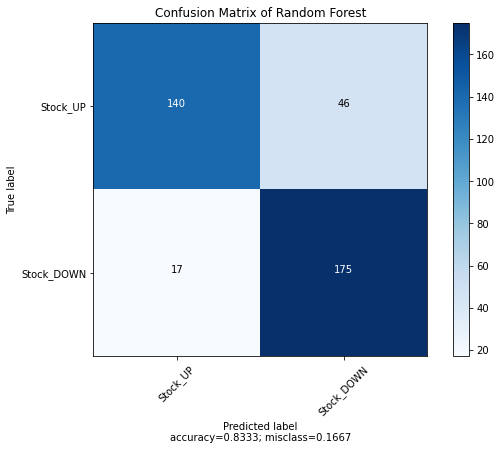

In [18]:

cm =  confusion_matrix(test_data['Label'],preds)

plot_confusion_matrix(cm = cm, 
                      normalize    = False,
                      target_names = ['Stock_UP','Stock_DOWN'],
                      title        = "Confusion Matrix of Random Forest")

In [19]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', random_state=1, gamma='auto', C=1.0)
#
# training
print("********************Training**********************")
clf.fit(train_headlines, train_data['Label'])

preds = clf.predict(test_headlines)

********************Training**********************


In [20]:
print(accuracy_score(test_data['Label'],preds))
confusion_matrix(test_data['Label'],preds)

0.5079365079365079


array([[  0, 186],
       [  0, 192]], dtype=int64)

In [21]:
class1 = (test_data['Label'] != preds).sum()
class1 = ((len(test_data['Label']) - class1)/len(test_data['Label'])) * 100
result.append(class1)


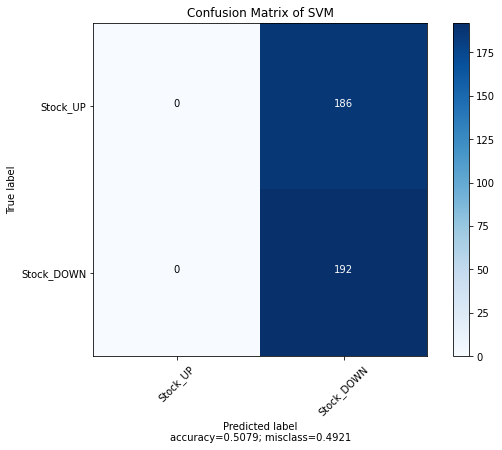

In [22]:

cm =  confusion_matrix(test_data['Label'],preds)

plot_confusion_matrix(cm = cm, 
                      normalize    = False,
                      target_names = ['Stock_UP','Stock_DOWN'],
                      title        = "Confusion Matrix of SVM")

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(train_headlines, train_data['Label'])
preds = classifier.predict(test_headlines)

In [24]:
print(accuracy_score(test_data['Label'],preds))
confusion_matrix(test_data['Label'],preds)

0.6216931216931217


array([[110,  76],
       [ 67, 125]], dtype=int64)

In [25]:
class1 = (test_data['Label'] != preds).sum()
class1 = ((len(test_data['Label']) - class1)/len(test_data['Label'])) * 100
result.append(class1)


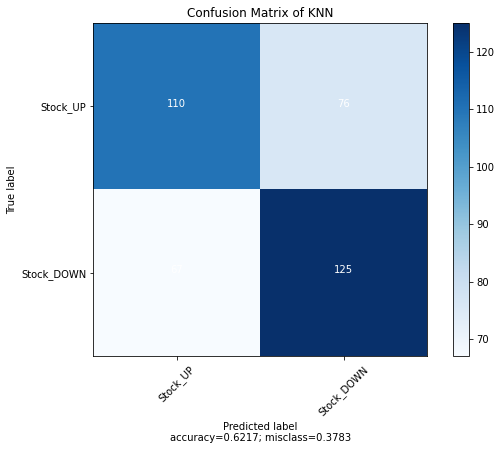

In [27]:

cm =  confusion_matrix(test_data['Label'],preds)

plot_confusion_matrix(cm = cm, 
                      normalize    = False,
                      target_names = ['Stock_UP','Stock_DOWN'],
                      title        = "Confusion Matrix of KNN")

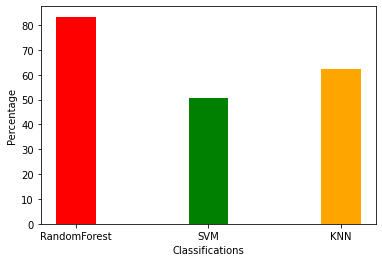

In [28]:
x = ["RandomForest", "SVM", "KNN"]
h = result
c = ["red", "green", "orange", "black"]
plt.bar(x,h,width=0.3, color=c)
plt.xlabel("Classifications")
plt.ylabel("Percentage")
plt.show()